In [1]:
#------------------------------------------------------------------------
# FUNCAO QUE MONTA O CIRCUITO DA QFT DE 'n' QUBITS:
#------------------------------------------------------------------------
def QFT(n, Changing_initial_state):
    from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit;
#------------------------------
    Q  = QuantumRegister(  n, name = 'j');
    C  = ClassicalRegister(n, name = 'c');
    QC = QuantumCircuit(Q, C, name = "QFT");
#------------------------------
#PREPARAÇÃO DO ESTADO INCIAL
#------------------------------     
    if Changing_initial_state == 0: # |00...0>
        None
    if Changing_initial_state == 1: # |11...1>
        for p in range(0,n):
            QC.x(Q[p]) # <-- PORTA 'X' NO QUBIT p
        QC.barrier()
    if Changing_initial_state == 2: # (|0>+|1>)_n
        for p in range(0,n):
            QC.h(Q[p]) # <-- PORTA 'H' NO QUBIT p
        QC.barrier()
    if Changing_initial_state == 3: # |11>
        QC.h(Q[0]) # <-- PORTA 'H' NO QUBIT p
        for p in range(1,n):
            QC.cx(Q[p-1], Q[p]) # <-- PORTA 'CNOT'
        QC.barrier()
#------------------------------
#PREPARAÇÃO DO ESTADO INCIAL: ESTADO ALEATORIO
#------------------------------
    if Changing_initial_state == 4: 
        from qiskit.visualization import plot_state_qsphere
        from qiskit.quantum_info import Statevector, random_statevector
        psi_random = random_statevector(2**(n))
        QC.initialize(psi_random.data, [r for r in range(n)])
        QC.barrier()
#------------------------------
#APLICANDO A QFT
#------------------------------
    for i in range(0, n):
        m = n - 1 - i;
        QC.h(Q[m]);
        for j in range(m, 0, -1):
            k = 2 + m - j;
            Rk(QC, Q[j-1], Q[m], k, 1.0);
        QC.barrier();
#------------------------------
# PORTA SWAP:
#------------------------------
    j = 0;
    while ( int(n/2) > j ):
        QC.swap( Q[j], Q[n-1 - j] );
        j = j + 1;
#------------------------------
    QC.barrier();
    QC.measure(Q, C); print(' QFT(): FUNCIONA');
#------------------------------
    return QC;
#------------------------------------------------------------------------
# FUNCAO QUE DEFINE A PORTA Rk USANDO A PORTA cu1:
#------------------------------------------------------------------------
def Rk(QC, Q_CONTROL, Q_TARGET, k, a):
    import math as MT; PI = MT.pi;
    QC.cu1( a*2.0*PI/2.0**k, Q_CONTROL, Q_TARGET);
    return None;

In [2]:
#------------------------------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA LOCAL:
#------------------------------------------------------------------------
def SIMULADOR_LOCAL(QC, N_SHOTS, BACKEND_NAME):
    from qiskit  import Aer;
    from qiskit  import execute;
#--------------
    F_NAME = '\'SIMULADOR_LOCAL()\'';
    BACKEND = Aer.get_backend(BACKEND_NAME);
#-----------------------------------------------------------------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    RESULT = EXP.result();
    print(' RESULTS:');
#   print('   EXP.result():', RESULT); # <-- IMPRIMI UM MONTE DE COISAS
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
#   print('   data:',         RESULT.data); <-- IMPRIMI UM MONTE DE COISAS
    print('   get_counts():', RESULT.get_counts() );
#-----------------------------------------------------------------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [28]:
n = 3; # <-- DEFININDO O NUMERO DE QUBITS
QC_QFT_43 = QFT(n,3);

 QFT(): FUNCIONA


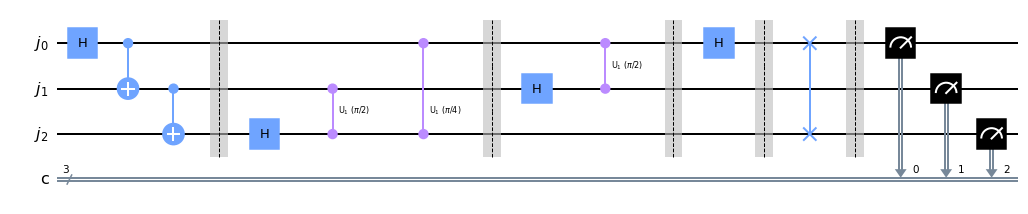

In [29]:
display( QC_QFT_43.draw(output='mpl'));

In [30]:
#------------------------------------------------------------------------
# SIMULANDO O CIRCUITO:
#------------------------------------------------------------------------
N_SHOTS = 10**(6)
BACKEND_NAME = "qasm_simulator"

DADOS_20 = SIMULADOR_LOCAL(QC_QFT_43, N_SHOTS, BACKEND_NAME)

 RESULTS:
   backend_name: qasm_simulator |   status: COMPLETED |   success: True
   get_counts(): {'110': 125025, '111': 213689, '001': 213500, '000': 250303, '010': 124509, '101': 36390, '011': 36584}
 ---------- FIM DA FUNCAO 'SIMULADOR_LOCAL()'---------- 


In [31]:
#------------------------------------------------------------------------
# PARA CRIAR O HISTOGRAMA:
#------------------------------------------------------------------------
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_histogram;

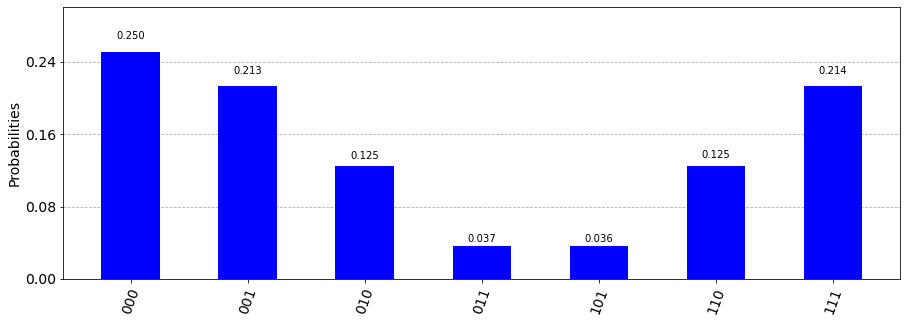

In [32]:
plot_histogram( DADOS_20, bar_labels = True, color='blue', figsize = (15, 5) )

In [33]:
#-------------------------------------------------
# REGISTRANDO-SE NA IBM:
#------------------------------------------------
# Obs. : esta linha de codigo deve ser executada uma unica vez .
# Caso precise executa−la novamente RESTARTE o KERNEL.
from qiskit import IBMQ
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
# Você pode obter o seu token em:
# https://quantum-computing.ibm.com/
QX_TOKEN = "cole seu token aqui"
QX_URL = "https://quantumexperience.ng.bluemix.net/api"
#−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−
try :
    IBMQ.save_account(QX_TOKEN)
    print('Registado com sucesso!')
except :
    print('Algo deu errado. \nVocê inseriu o token correto?')

configrc.store_credentials:WARNING:2021-09-21 21:40:10,394: Credentials already present. Set overwrite=True to overwrite.


Registado com sucesso!


In [34]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-09-21 21:40:13,039: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [35]:
from qiskit.tools.monitor import  backend_overview

backend_overview()

ibmq_manila                  ibmq_quito                   ibmq_belem
-----------                  ----------                   ----------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 34             Pending Jobs: 21             Pending Jobs: 2
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      135.1          Avg. T1:      84.0           Avg. T1:      90.2
Avg. T2:      66.7           Avg. T2:      97.1           Avg. T2:      101.7



ibmq_lima                    ibmq_bogota                  ibmq_santiago
---------                    -----------                  -------------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 49             Pending Jobs: 2              Pending Jobs: 5
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           Op

In [36]:
#--------------------------------------------------
# FUNCAO QUE EXECUTA O CIRCUITO NA MAQUINA REMOTA:
#--------------------------------------------------
def SIMULADOR_REMOTO(QC, N_SHOTS, BACKEND_NAME):
    F_NAME = '\'SIMULADOR_REMOTO()\'';
    from qiskit               import IBMQ;
    from qiskit               import execute;
    from qiskit.tools.monitor import job_monitor;
#--------------
    PROVIDER = IBMQ.get_provider();
    BACKEND  = PROVIDER.get_backend(BACKEND_NAME);
#--------------
    STATUS  = BACKEND.status();
    if( STATUS.operational == False ):
        print(' FUNCAO %s DIZ:'% F_NAME );
        print(' ESTE BACKEND NAO ESTA OPERACIONAL NO MOMENTO, VEJA:');
        print("    STATUS.operational =",  STATUS);
        print(' ENCERRANDO'); return None;
#---------------
    EXP = execute(QC, BACKEND, shots=N_SHOTS);
    job_monitor(EXP, interval = 5);
#---------------
    RESULT = EXP.result();
    print(' RESULTS:');
    print('   backend_name:', RESULT.backend_name, end =' |');
    print('   status:',       RESULT.status, end =' |');
    print('   success:',      RESULT.success);
    print('   get_counts():', RESULT.get_counts() ); # print(' get_data() = ',   result.get_data(qc) );
#----------------
    print(' ---------- FIM DA FUNCAO %s---------- '% F_NAME);
    return RESULT.get_counts();

In [39]:
# NUMERO DE VEZES EM QUE O CIRCUITO EH EXECUTADO. 2**(13) EH O MAXIMO QUE A IBM ACEITA
N_SHOTS = 2**(13)

# ESCOLHENDO 2 BACKENDS COM FILA DE JOBS PEQUENA (OLHEI ACIMA).

BACKEND_NAME = "ibmq_santiago";   DADOS_20_santiago   = SIMULADOR_REMOTO(QC_QFT_43, N_SHOTS, BACKEND_NAME);
BACKEND_NAME = "ibmq_belem";    DADOS_20_belem    = SIMULADOR_REMOTO(QC_QFT_43, N_SHOTS, BACKEND_NAME);

Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_santiago |   status: Successful completion |   success: True
   get_counts(): {'000': 1768, '001': 1059, '010': 889, '011': 534, '100': 604, '101': 773, '110': 1271, '111': 1294}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 
Job Status: job has successfully run
 RESULTS:
   backend_name: ibmq_belem |   status: Successful completion |   success: True
   get_counts(): {'000': 1739, '001': 1503, '010': 1203, '011': 937, '100': 412, '101': 499, '110': 853, '111': 1046}
 ---------- FIM DA FUNCAO 'SIMULADOR_REMOTO()'---------- 


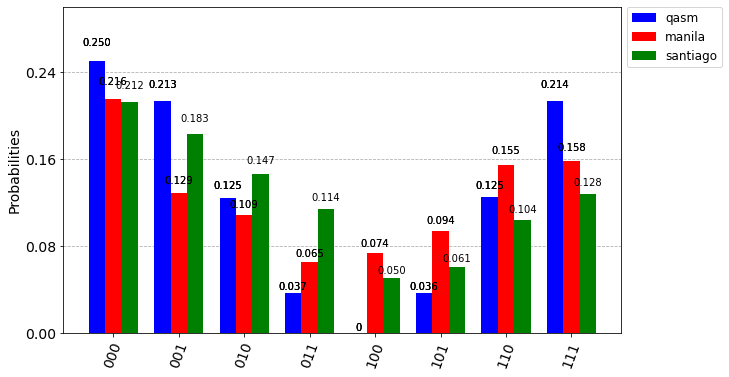

In [40]:
plot_histogram( [DADOS_20, DADOS_20_santiago, DADOS_20_belem], legend =['qasm', 'manila', 'santiago'], bar_labels = True, color=['blue', 'red', 'green'], figsize = (10, 6) )